In [ ]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing import image
from keras.preprocessing import sequence
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import DenseNet
from keras.applications.densenet import DenseNet121
import itertools 
from keras.layers import Embedding
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3


from keras.datasets import imdb
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from keras import backend as K
import tensorflow as tf
from glob import glob
import numpy as np
import PIL.Image
import PIL
import cv2
import os


In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
img=image.load_img("/content/drive/MyDrive/Datatset/Tomato_Leaf_Disease/Test/Tomato_Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG")

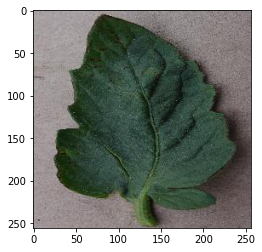

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Datatset/Tomato_Leaf_Disease/Test/Tomato_Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG").shape

(256, 256, 3)

In [ ]:
cv2.imread("/content/drive/MyDrive/Datatset/Tomato_Leaf_Disease/Test/Tomato_Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG")

array([[[166, 166, 172],
        [164, 164, 170],
        [168, 168, 174],
        ...,
        [106, 105, 115],
        [117, 116, 126],
        [128, 127, 137]],

       [[167, 167, 173],
        [162, 162, 168],
        [163, 163, 169],
        ...,
        [133, 132, 142],
        [146, 145, 155],
        [133, 132, 142]],

       [[172, 172, 178],
        [164, 164, 170],
        [162, 162, 168],
        ...,
        [110, 109, 119],
        [120, 119, 129],
        [137, 136, 146]],

       ...,

       [[158, 157, 167],
        [155, 154, 164],
        [157, 156, 166],
        ...,
        [100, 100, 112],
        [120, 120, 132],
        [ 95,  95, 107]],

       [[155, 154, 164],
        [150, 149, 159],
        [152, 151, 161],
        ...,
        [106, 106, 118],
        [114, 114, 126],
        [101, 101, 113]],

       [[157, 156, 166],
        [153, 152, 162],
        [159, 158, 168],
        ...,
        [115, 115, 127],
        [107, 107, 119],
        [109, 109, 121]]

In [ ]:
train= ImageDataGenerator(rescale=1/255)

valid=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)


In [ ]:
trainpath='/content/drive/MyDrive/Datatset/Tomato_Leaf_Disease/Train'
validpath='/content/drive/MyDrive/Datatset/Tomato_Leaf_Disease/Validation'
testpath='/content/drive/MyDrive/Datatset/Tomato_Leaf_Disease/Test'

In [ ]:
train_dataset=train.flow_from_directory(trainpath, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

valid_dataset=valid.flow_from_directory(validpath,
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

test_dataset=test.flow_from_directory(testpath,
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

Found 10287 images belonging to 10 classes.
Found 2552 images belonging to 10 classes.
Found 3192 images belonging to 10 classes.


In [ ]:
model=Sequential()
model.add(InceptionV3(include_top=False,
                  pooling='avg',
                   weights='imagenet'))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].trainable=False

In [ ]:
matrics_accuracy=tf.keras.metrics.BinaryAccuracy()
metrics_precision = tf.keras.metrics.Precision()
metrics_recall = tf.keras.metrics.Recall()
metrics_f1score=tfa.metrics.F1Score(num_classes=10, average="micro")
metrics_auc=tf.keras.metrics.AUC()


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=[matrics_accuracy,metrics_precision,metrics_recall,metrics_f1score,metrics_auc])

In [ ]:

history=model.fit( train_dataset, epochs=50, steps_per_epoch=643, validation_data=(valid_dataset), validation_steps=160)

Epoch 1/50
643/643 [==============================] - 2576s 4s/step - loss: 0.9277 - binary_accuracy: 0.9447 - precision: 0.8415 - recall: 0.5513 - f1_score: 0.6925 - auc: 0.9508 - val_loss: 0.6254 - val_binary_accuracy: 0.9603 - val_precision: 0.8701 - val_recall: 0.7085 - val_f1_score: 0.7919 - val_auc: 0.9775
Epoch 2/50
643/643 [==============================] - 82s 127ms/step - loss: 0.5554 - binary_accuracy: 0.9646 - precision: 0.8814 - recall: 0.7467 - f1_score: 0.8145 - auc: 0.9822 - val_loss: 0.5805 - val_binary_accuracy: 0.9619 - val_precision: 0.8545 - val_recall: 0.7457 - val_f1_score: 0.7966 - val_auc: 0.9796
Epoch 3/50
643/643 [==============================] - 82s 127ms/step - loss: 0.4530 - binary_accuracy: 0.9713 - precision: 0.9008 - recall: 0.8013 - f1_score: 0.8505 - auc: 0.9878 - val_loss: 0.5499 - val_binary_accuracy: 0.9635 - val_precision: 0.8504 - val_recall: 0.7708 - val_f1_score: 0.8053 - val_auc: 0.9814
Epoch 4/50
643/643 [==============================] - 82

In [ ]:
valid_score = model.evaluate_generator(valid_dataset, steps=2, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(valid_score[1] * 100)) 
print("[INFO] Loss: ",valid_score[0])
print("[INFO] precision: ",valid_score[2])
print("[INFO] recall: ",valid_score[3])
print("[INFO] f-score: ",valid_score[4])
print("[INFO] AUC: ",valid_score[3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 0s 137ms/step - loss: 0.5228 - binary_accuracy: 0.9719 - precision: 0.8710 - recall: 0.8438 - f1_score: 0.8438 - auc: 0.9891
[INFO] accuracy: 97.19%
[INFO] Loss:  0.5228099226951599
[INFO] precision:  0.8709677457809448
[INFO] recall:  0.84375
[INFO] f-score:  0.84375
[INFO] AUC:  0.84375


In [ ]:
test_score = model.evaluate_generator(test_dataset, steps=2, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])
print("[INFO] Precision: ",test_score[2])
print("[INFO] Recall: ",test_score[3])
print("[INFO] f1-score: ",test_score[4])
print("[INFO] AUC: ",test_score[5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 3s 3s/step - loss: 0.4151 - binary_accuracy: 0.9813 - precision: 0.9062 - recall: 0.9062 - f1_score: 0.9062 - auc: 0.9814
[INFO] accuracy: 98.13%
[INFO] Loss:  0.41514915227890015
[INFO] Precision:  0.90625
[INFO] Recall:  0.90625
[INFO] f1-score:  0.90625
[INFO] AUC:  0.9814453125


In [ ]:
train_score = model.evaluate_generator(train_dataset,steps=6, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100)) 

print("[INFO] Loss: ",train_score[0])

print("[INFO] Precision: ",train_score[2])
print("[INFO] Recall: ",train_score[3])
print("[INFO] f1-score: ",train_score[4])
print("[INFO] AUC: ",train_score[5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


6/6 [==============================] - 1s 118ms/step - loss: 0.0485 - binary_accuracy: 0.9958 - precision: 0.9792 - recall: 0.9792 - f1_score: 0.9792 - auc: 0.9999
[INFO] accuracy: 99.58%
[INFO] Loss:  0.048472221940755844
[INFO] Precision:  0.9791666865348816
[INFO] Recall:  0.9791666865348816
[INFO] f1-score:  0.9791666865348816
[INFO] AUC:  0.9998915195465088


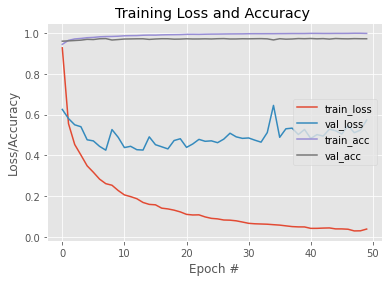

In [ ]:
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["binary_accuracy"], label="train_acc")
plt.plot(N, history.history["val_binary_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")

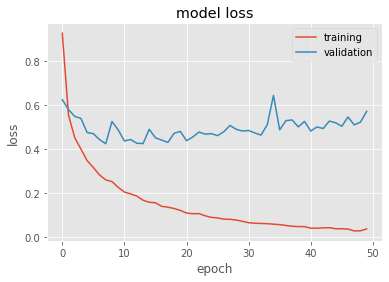

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

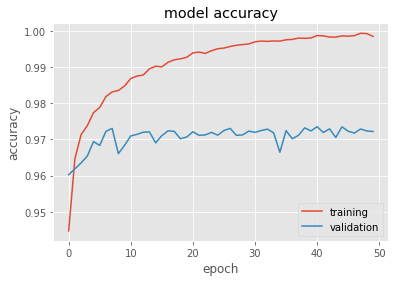

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Datatset/Tomato_Leaf_Disease/Test',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical') 

Found 3192 images belonging to 10 classes.


In [ ]:
true_classes = test_generator.classes

y_pred = model.predict(test_generator, steps=200, verbose=1).round()

print(classification_report(true_classes, y_pred.round()))

200/200 [==============================] - 628s 3s/step


ValueError: ignored

In [ ]:
true_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    recall=recall_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
   
    cm=confusion_matrix(y_true, y_pred)
   
    plt.figure(figsize = (7,5))
    sn.heatmap( cm, annot=True,cmap="OrRd")
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    print(cm)
    return accuracy, precision,  recall, f1Score

In [ ]:
testAcc,testPrec,testrecall, testFScore = my_metrics(true_classes, y_pred.round())

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(test_generator)
pred = np.argmax(pred,axis = 1) 


In [ ]:
pred

array([0, 7, 0, ..., 5, 0, 6])

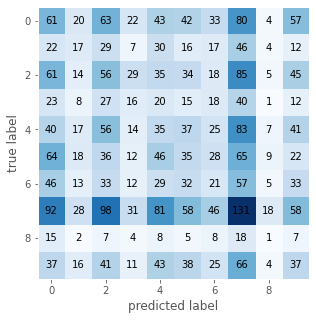

In [ ]:
CM = confusion_matrix(true_classes, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

Text(0.5, 24.0, 'Predicted')

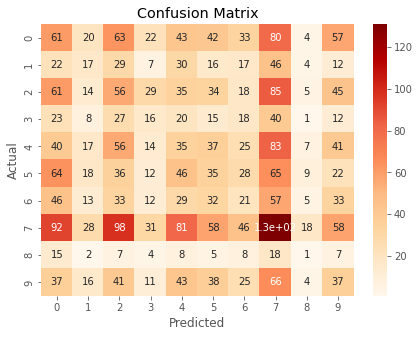

In [ ]:
CM = confusion_matrix(true_classes, pred)
from mlxtend.plotting import plot_confusion_matrix
plt.figure(figsize = (7,5))
sn.heatmap( CM, annot=True,cmap="OrRd")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")